# グラフの文字で英語以外を使えるようにする

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ca8fa67e4c555a231f8cfddd369f08f9083a8c7438e346ce68675d90a62ad0a4
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 save_fig：図の保存

In [2]:
import os
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

# 実習5.1：ホールドアウト検証の練習

In [3]:
import random
import numpy as np
from sklearn.model_selection import train_test_split

# 乱数シードを固定
random.seed(0)
np.random.seed(0)

# 説明変数の値
alpha = np.array(['a', 'b', 'c', 'd', 'e', 'f'])


# 目的変数の値: 0から5までの整数を要素に持つリスト
num = np.arange(len(alpha))

print('alpha:', alpha)
print('num:', num)

# x_train: 訓練データの説明変数、x_test: テストデータの説明変数
# y_train: 訓練データの目的変数、y_test: テストデータの目的変数
# train_size: 全データから訓練データに割り当てる割合
x_train, x_test, y_train, y_test=train_test_split(alpha, # 説明変数
                                                           num,   # 目的変数
                                                           train_size=0.5,
                                                           random_state=0) # 乱数シードを固定

print('訓練データ数:', len(x_train))
for i in range(len(x_train)):
    print(x_train[i], y_train[i])

print('テストデータ数:', len(x_test))
for i in range(len(x_test)):
    print(x_test[i], y_test[i])

alpha: ['a' 'b' 'c' 'd' 'e' 'f']
num: [0 1 2 3 4 5]
訓練データ数: 3
d 3
a 0
e 4
テストデータ数: 3
f 5
c 2
b 1


# 実習5.2：K分割交差検証の練習

In [4]:
import random
import numpy as np
from sklearn.model_selection import KFold

# 乱数シードを固定
random.seed(0)
np.random.seed(0)

# 説明変数の値
alpha = np.array(['a', 'b', 'c', 'd', 'e', 'f'])


# 目的変数の値: 0から5までの整数を要素に持つリスト
num = np.arange(len(alpha))

print('alpha:', alpha)
print('num:', num)

# 分割数 n_splits を2に設定
kf = KFold(n_splits=2)

i=1 # 反復

# 分割して、訓練データのインデックスをtrain_indexに
# テストデータのインデックスをtest_indexに取り出す。
for train_index, test_index in kf.split(alpha):
    print('\n反復', i, '*'*20)
    print('訓練データ')
    print('割り当てる個数 =', len(train_index))
    print('割り当てるインデックス =', train_index)
    # インデックスを使い、教師データから訓練データを取り出す
    x_train = alpha[train_index] # 説明変数の値
    t_train = num[train_index] # 目的変数の値
    print('説明変数 =', x_train)
    print('目的変数 =', t_train)

    print('テストデータ')
    print('割り当てる個数 =', len(test_index))
    print('割り当てるインデックス =', test_index)
    # インデックスを使い、教師データから訓練データを取り出す
    x_test = alpha[test_index] # 説明変数の値
    t_test = num[test_index] # 目的変数の値
    print('説明変数 =', x_test)
    print('目的変数 =', t_test)
    i+=1

alpha: ['a' 'b' 'c' 'd' 'e' 'f']
num: [0 1 2 3 4 5]

反復 1 ********************
訓練データ
割り当てる個数 = 3
割り当てるインデックス = [3 4 5]
説明変数 = ['d' 'e' 'f']
目的変数 = [3 4 5]
テストデータ
割り当てる個数 = 3
割り当てるインデックス = [0 1 2]
説明変数 = ['a' 'b' 'c']
目的変数 = [0 1 2]

反復 2 ********************
訓練データ
割り当てる個数 = 3
割り当てるインデックス = [0 1 2]
説明変数 = ['a' 'b' 'c']
目的変数 = [0 1 2]
テストデータ
割り当てる個数 = 3
割り当てるインデックス = [3 4 5]
説明変数 = ['d' 'e' 'f']
目的変数 = [3 4 5]


# 実習5.3：年齢-身長データの読み込み

In [5]:
import pandas as pd

df = pd.read_csv('dm5-1.csv',
                 encoding='utf-8')

df

,年齢,男性身長,男性体重,女性身長,女性体重
0,1,79.7,10.4,77.2,10.2
1,2,88.6,12.6,87.5,12.3
2,3,96.0,14.2,96.1,14.6
3,4,101.2,15.4,102.3,15.9
4,5,110.0,18.2,109.3,18.1
5,6,115.6,20.4,114.8,20.3
6,7,122.0,24.2,119.6,22.3
7,8,127.8,26.6,125.7,26.0
8,9,131.8,29.1,134.4,29.7
9,10,138.4,33.8,140.6,33.7


# 実習5.4： 多項式モデル用説明変数を準備する関数

In [6]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(x, degree):
    """多項式モデル用説明変数を準備
    Args:
        x (ndarary): 1次元配列。Nはデータ数
        degree (int): 多項式の次数

    Returns:
        x2 (ndarray): 2次元配列。形状(N, degree)。
    """
    x2=x.reshape(-1,1) # PolynomialFeaturesで扱うため、2次元配列(N, 1)に変形
    if degree >= 2: # 2次以上なら
        pf = PolynomialFeatures(degree=degree, include_bias=False)
        x2 = pf.fit_transform(x2)

    return x2

# テスト
a = np.arange(5)
print(a)
b = prepare_data(a, degree=3)
print(b)

[0 1 2 3 4]
[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]


# 実習5.5：年齢-男性身長データ ホールドアウト検証による汎化能力推定

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 乱数シードを固定
random.seed(0)
np.random.seed(0)

x = df['年齢'].to_numpy().reshape(-1, 1)
y = df['男性身長'].to_numpy()

# x_train: 訓練データの説明変数、x_test: テストデータの説明変数
# y_train: 訓練データの目的変数、y_test: テストデータの目的変数
# train_size: 全データから訓練データに割り当てる割合
x_train, x_test, y_train, y_test=train_test_split(x, # 説明変数
                                                           y, # 目的変数
                                                           train_size=0.7,
                                                           random_state=0) # 乱数シードを固定

print('訓練データ数:', len(x_train))
print('テストデータ数:', len(x_test))

# 14次の多項式回帰用に訓練データ説明変数の値を準備
x_train2 = prepare_data(x_train, degree=14)
print('x_train2の形状:', x_train2.shape)

model = LinearRegression() # 回帰分析クラスのインスタンス生成
model.fit(x_train2,y_train)
y_train_pred = model.predict(x_train2)
mse_train = mean_squared_error(y_train, y_train_pred) # MSE計算
print('訓練データのMSE:', mse_train)

# 汎化能力の推定
# 14次の多項式回帰用にテストデータ説明変数の値を準備
x_test2 = prepare_data(x_test, degree=14)
y_test_pred = model.predict(x_test2)
mse_test = mean_squared_error(y_test, y_test_pred) # MSE計算
print('テストデータのMSE:', mse_test)

訓練データ数: 17
テストデータ数: 8
x_train2の形状: (17, 14)
訓練データのMSE: 19.63364969182829
テストデータのMSE: 258895.83525538963


# 実習5.6：データと回帰曲線の可視化

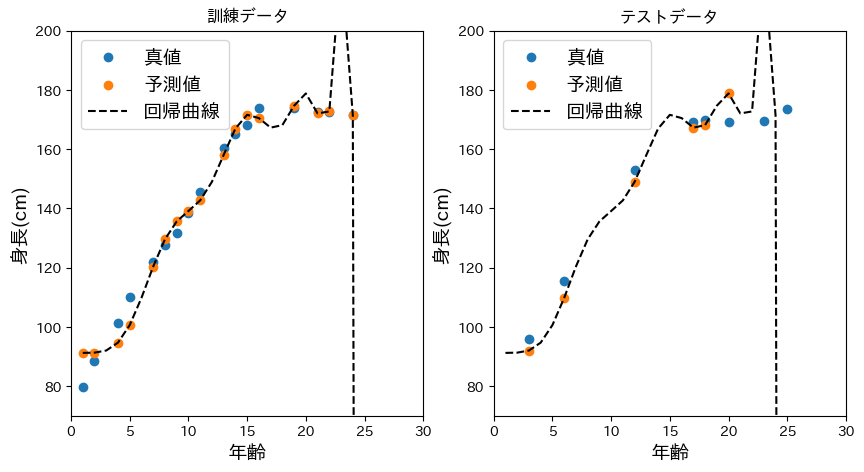

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# 年齢xの最小値以上最大値以下の整数を説明変数として生成
xs = np.arange(x.min(), x.max()+1)
# 多項式回帰用に説明変数を準備
xs2 = prepare_data(xs, degree=14)
# 学習したモデル目的変数の値を予測
pred=model.predict(xs2)

# 横に並ぶ2つの図を作成
plt.figure(figsize=(10, 5))
# 訓練データについてのグラフ
plt.subplot(1, 2, 1)
plt.title('訓練データ')
plt.scatter(x_train, y_train, label="真値")
plt.scatter(x_train, y_train_pred, label="予測値")
plt.plot(xs, pred, color='black', ls='dashed', label="回帰曲線")
plt.legend(fontsize=14)
plt.ylim(70, 200)
plt.xlim(0, 30)
plt.xlabel('年齢', fontsize=14)
plt.ylabel('身長(cm)', fontsize=14)

# テストデータについてのグラフ
plt.subplot(1, 2, 2)
plt.title('テストデータ')
plt.scatter(x_test, y_test, label="真値")
plt.scatter(x_test, y_test_pred, label="予測値")
plt.plot(xs, pred, color='black', ls='dashed', label="回帰曲線")
plt.legend(fontsize=14)
plt.ylim(70, 200)
plt.xlim(0, 30)
plt.xlabel('年齢', fontsize=14)
plt.ylabel('身長(cm)', fontsize=14)
plt.show()

# 実習5.7：年齢-女性身長データ リーブワンアウト交差検証

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

x = df['年齢'].to_numpy() # 説明変数の値を取り出す。
y = df['女性身長'].to_numpy() # 目的変数の値を取り出す。

#  多項式の次数を1以上16以下で準備
degrees=np.arange(1, 17)

def train_and_predict(x, y, degree):
    """1つのモデルに対する訓練と予測を行う。
    Args:
        x (ndarray): 説明変数。1次元配列
        y (ndarray): 目的変数。1次元配列
        degree (int): 多項式の次数

    Returns:
        test_error_std (flost): 交差検証誤差の平均
        test_error_std (flost): 交差検証誤差の標準偏差
    """
    # 多項式回帰用に説明変数を準備
    x2 = prepare_data(x, degree=degree)
    # 分割数 n_splits を2に設定
    kf = KFold(n_splits=len(x2))
    # 各サブセットでテストデータに対する予測誤差を格納するリスト
    test_mse_values = []

    for train_index, test_index in kf.split(x2):
        x_train = x2[train_index] # 訓練データ説明変数
        y_train = y[train_index]  # 訓練データ目的変数
        x_test = x2[test_index]   # テストデータ説明変数
        y_test = y[test_index]    # テストデータ目的変数

        model=LinearRegression()
        # 訓練データに対する回帰
        model.fit(x_train,y_train)

        # テストデータに対する予測
        y_test_pred = model.predict(x_test)
        # テストデータのMSE計算
        mse = mean_squared_error(y_test, y_test_pred)
        test_mse_values.append(mse)

    # 二乗誤差の平方根を取り、誤差の単位をcm二乗からcmへ戻す
    test_error_mean = np.sqrt(np.mean(test_mse_values)) # 誤差の平均
    test_error_std = np.sqrt(np.std(test_mse_values)) # 誤差の標準偏差
    return test_error_mean, test_error_std

# 関数の外
test_error_mean = []
test_error_std = []
print('次数\t誤差\t誤差の標準偏差')
for d in degrees:
    m, s = train_and_predict(x, y, d)
    test_error_mean.append(m)
    test_error_std.append(s)
    print(f'{d}\t{m:.2f}\t{s:.2f}')

次数	誤差	誤差の標準偏差
1	12.31	12.70
2	3.18	3.67
3	2.99	3.05
4	2.35	2.97
5	2.77	3.87
6	2.29	4.11
7	2.92	4.79
8	1.32	1.75
9	2.46	4.74
10	3.63	7.52
11	1.34	1.76
12	9.42	19.93
13	36.49	79.15
14	58.09	126.81
15	94.72	207.58
16	155.35	340.77


# 実習5.8：年齢-女性身長データ 次数と交差検証誤差

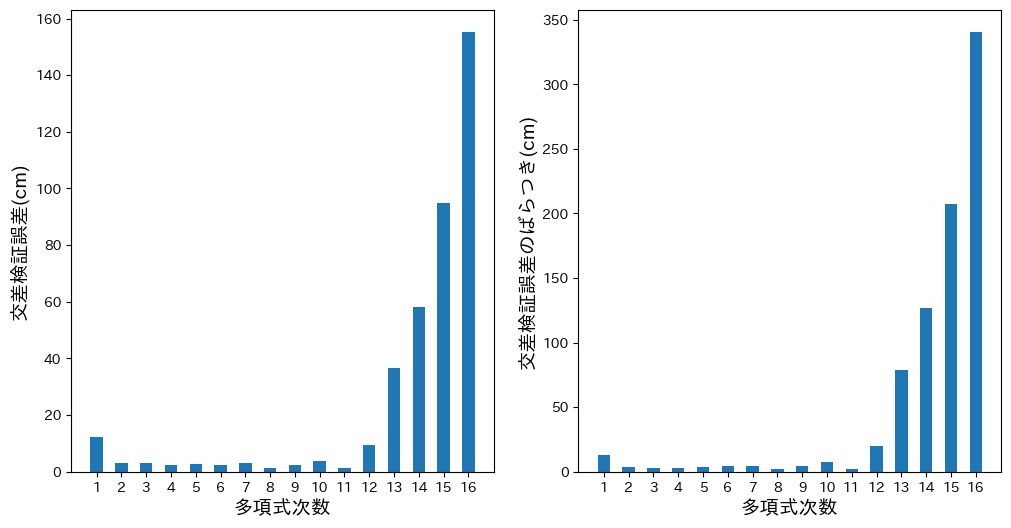

In [10]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(12, 6))

labels = [str(d) for d in degrees]
width = 0.5

plt.subplot(1, 2, 1)
plt.bar(labels, test_error_mean, width=width, align='center')
plt.xlabel('多項式次数', fontsize=14)
plt.ylabel('交差検証誤差(cm)', fontsize=14)

plt.subplot(1, 2, 2)
plt.bar(labels, test_error_std, width=width, align='center')
plt.xlabel('多項式次数', fontsize=14)
plt.ylabel('交差検証誤差のばらつき(cm)', fontsize=14)
plt.show()

# 実習5.9：年齢-女性身長データ 最適なモデルの回帰曲線

最適な次数: 8


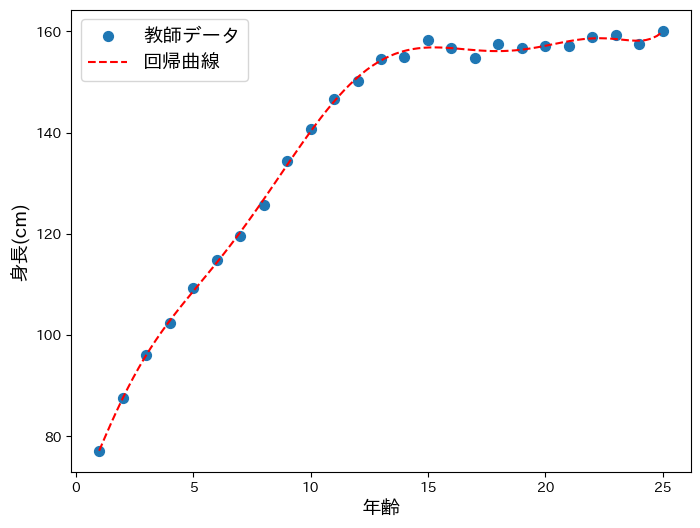

In [11]:
# test_error_stdの要素の中で最小値であるインデックスを取得
index = np.argmin(test_error_std)
optimum_degree = degrees[index]
print('最適な次数:', optimum_degree)

# 最適な次数の多項式回帰用に、全説明変数を対象にデータを準備
x2 = prepare_data(x, degree=optimum_degree)

model=LinearRegression() # 回帰分析用クラスのインスタンス生成
model.fit(x2,y) # モデルパラメータの推定

xs = np.linspace(x.min(), x.max(), 100)
xs2 = prepare_data(xs, degree=optimum_degree)
ys = model.predict(xs2)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=50, label="教師データ")
plt.plot(xs, ys, color='red', linestyle='dashed', label="回帰曲線")
plt.legend(fontsize=14)
plt.xlabel('年齢', fontsize=14)
plt.ylabel('身長(cm)', fontsize=14)
plt.show()